In [9]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from utils import *

In [10]:
items = pd.read_csv('mimic/D_ITEMS.csv')
labitems = pd.read_csv('mimic/D_LABITEMS.csv')

In [51]:
table = pd.read_csv('18features.csv').drop('Unnamed: 0', axis=1)
other = pd.read_csv('filled_oh.csv').drop('Unnamed: 0', axis=1)
full = table.merge(other, on='HADM_ID')
admission = pd.read_csv("mimic/ADMISSIONS.csv")
patient = pd.read_csv('mimic/PATIENTS.csv')
diagnoses = pd.read_csv('mimic/DIAGNOSES_ICD.csv')

admission = admission.merge(patient, on='SUBJECT_ID')
admission['age'] = calculate_age(admission, 'ADMITTIME', 'DOB')
admission = admission[admission['age']>=15]
admission['GENDER'] = admission['GENDER'].apply(lambda x: 1 if x=='M' else 0)
diagnoses['disease'] = diagnoses['ICD9_CODE'].apply(lambda x: D_Category[assign_category(x)])
diagnoses = diagnoses[['HADM_ID', 'disease']]
diag_oh = pd.get_dummies(diagnoses, columns=['disease'])
diag_oh = diag_oh.groupby('HADM_ID').sum()


admission = admission[['HADM_ID', 'ADMISSION_TYPE', 'GENDER', 'age', 'INSURANCE']]
admission = admission.merge(diag_oh, on='HADM_ID')
admission

,HADM_ID,ADMISSION_TYPE,GENDER,age,INSURANCE,disease_certain conditions originating in the perinatal period,"disease_complications of pregnancy, childbirth, and the puerperium",disease_congenital anomalies,disease_diseases of the blood and blood-forming organs,disease_diseases of the circulatory system,...,disease_diseases of the nervous system and sense organs,disease_diseases of the respiratory system,disease_diseases of the skin and subcutaneous tissue,"disease_endocrine, nutritional and metabolic diseases, and immunity disorders",disease_external causes of injury and supplemental classification,disease_infectious and parasitic diseases,disease_injury and poisoning,disease_mental disorders,disease_neoplasms,"disease_symptoms, signs, and ill-defined conditions"
0,165315,EMERGENCY,0,65,Private,0,0,0,0,1,...,1,0,0,0,2,0,2,1,0,0
1,152223,ELECTIVE,1,71,Medicare,0,0,0,0,4,...,1,0,0,1,1,0,0,0,0,0
2,124321,EMERGENCY,1,75,Medicare,0,0,0,0,2,...,1,0,0,2,3,0,0,0,1,1
3,161859,EMERGENCY,1,39,Private,0,0,0,0,2,...,0,0,0,1,0,0,0,0,0,0
4,129635,EMERGENCY,1,59,Private,0,0,0,0,3,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50861,190603,ELECTIVE,1,78,Medicare,0,0,0,0,1,...,1,0,0,0,3,0,0,0,0,0
50862,105447,EMERGENCY,1,88,Medicare,0,0,0,0,1,...,3,1,0,1,1,0,1,0,0,0
50863,191113,EMERGENCY,0,20,Private,0,0,0,1,0,...,0,0,0,0,1,0,5,0,0,0
50864,101071,EMERGENCY,0,84,Medicare,0,0,0,0,3,...,0,0,0,0,1,0,0,0,0,0


# Length of Stay

In [52]:
data = full.merge(admission, on='HADM_ID')
data

,HADM_ID,LOS,HOSPITAL_EXPIRE_FLAG,gcs_vr,gcs_mr,gcs_eye,bp,hr,temp,fio2,...,disease_diseases of the nervous system and sense organs,disease_diseases of the respiratory system,disease_diseases of the skin and subcutaneous tissue,"disease_endocrine, nutritional and metabolic diseases, and immunity disorders",disease_external causes of injury and supplemental classification,disease_infectious and parasitic diseases,disease_injury and poisoning,disease_mental disorders,disease_neoplasms,"disease_symptoms, signs, and ill-defined conditions"
0,165315,1.144444,0,1.0,6.0,3.0,130.00000,85.000000,36.444444,77.095479,...,1,0,0,0,2,0,2,1,0,0
1,152223,5.496528,0,1.0,1.0,1.0,106.00000,90.000000,36.722221,100.000000,...,1,0,0,1,1,0,0,0,0,0
2,124321,6.768056,0,5.0,6.0,4.0,130.53345,88.435512,36.703113,77.095479,...,1,0,0,2,3,0,0,0,1,1
3,161859,2.856944,0,5.0,6.0,4.0,144.00000,63.000000,36.166666,77.095479,...,0,0,0,1,0,0,0,0,0,0
4,129635,3.534028,0,5.0,6.0,4.0,114.00000,72.000000,36.722221,77.095479,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,190603,4.145833,0,1.0,5.0,2.0,135.00000,80.000000,36.666667,80.000000,...,1,0,0,0,3,0,0,0,0,0
50773,105447,0.662500,1,1.0,5.0,2.0,153.00000,81.000000,35.722222,60.000000,...,3,1,0,1,1,0,1,0,0,0
50774,191113,2.742361,0,1.0,1.0,2.0,120.00000,122.000000,37.055556,100.000000,...,0,0,0,0,1,0,5,0,0,0
50775,101071,0.548611,1,3.0,3.0,1.0,162.00000,86.000000,36.555556,50.000000,...,0,0,0,0,1,0,0,0,0,0


In [53]:
data = pd.get_dummies(data, columns=['ADMISSION_TYPE', 'INSURANCE'])
data['y1'] = data['LOS'].apply(lambda x: 0 if x<3 else 1)
data['y2'] = data['LOS'].apply(lambda x: 0 if x<7 else 1)
rus = RandomUnderSampler(random_state=0)
y1 = data['y1']
y2 = data['y2']
X = data.drop(['LOS', 'y1', 'y2', 'HOSPITAL_EXPIRE_FLAG', 'HADM_ID'], axis=1)
X1, y1 = rus.fit_resample(X, y1)

rus2 = RandomUnderSampler(random_state=2)

X2, y2 = rus2.fit_resample(X, y2)


feature_names=list(X)


In [55]:
mm = preprocessing.MinMaxScaler()
mm.fit(pd.concat([X1, X2]))
X1 = mm.transform(X1)
X2 = mm.transform(X2)

X2.shape

(49574, 274)

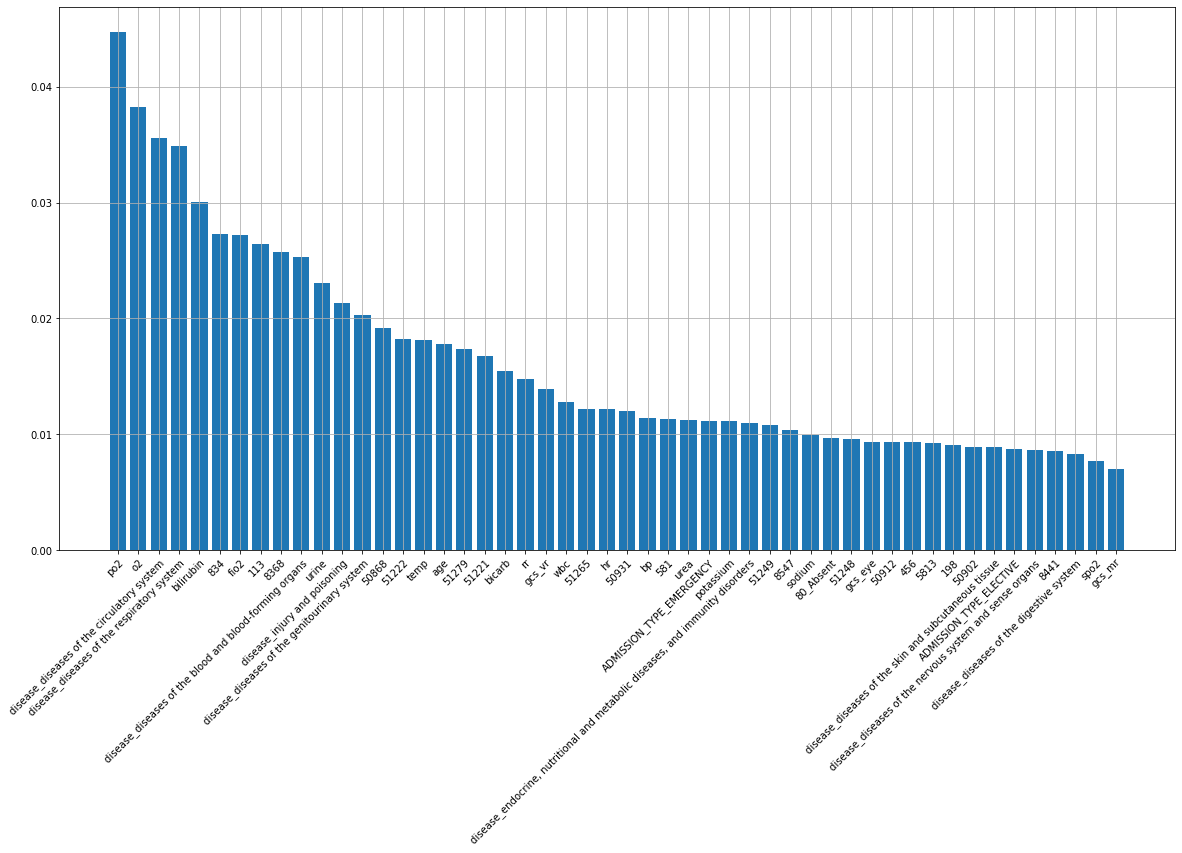

In [56]:
rfc = RandomForestClassifier(max_depth=10, random_state=2)
rfc.fit(X1, y1)
importance = rfc.feature_importances_
fig, ax = plt.subplots(figsize=(20, 10))
a, b = zip(*sorted(zip(importance,feature_names), reverse=True))

ax.bar(b[:50], a[:50])

ax.set_xticklabels(labels = b[:50])
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.grid()
plt.show();


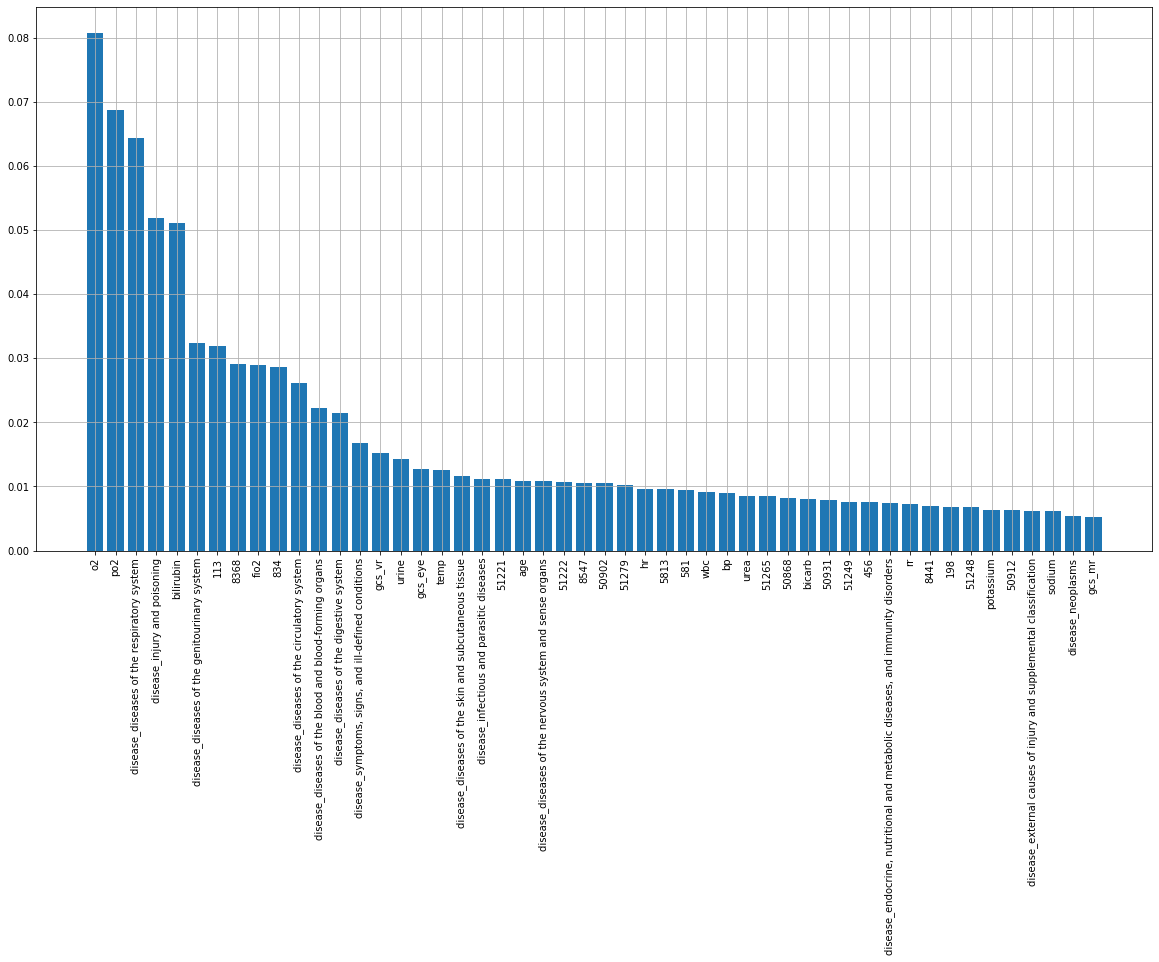

In [57]:
rfc = RandomForestClassifier(max_depth=10, random_state=0)
rfc.fit(X2, y2)
importance = rfc.feature_importances_
fig, ax = plt.subplots(figsize=(20, 10))
a, b = zip(*sorted(zip(importance,feature_names), reverse=True))

ax.bar(b[:50], a[:50])

ax.set_xticklabels(labels = b[:50], rotation=90)
ax.grid()
plt.show();

In [58]:
items[(items['ITEMID']==8368) | (items['ITEMID']==113) | (items['ITEMID']==834)]

,ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
381,118,113,CVP,NaN,carevue,chartevents,NaN,NaN,NaN,NaN
749,1126,834,SaO2,NaN,carevue,chartevents,ABG's,NaN,NaN,NaN
4637,4831,8368,Arterial BP [Diastolic],NaN,carevue,chartevents,NaN,NaN,NaN,NaN


In [59]:
selected_features = ['113', '834', '8368']
selected = other[selected_features+['HADM_ID']]
selected = selected.rename(columns={'113':'cvp', '834':'sao2', '8368':'abpd'})
los_features = selected.merge(admission, on='HADM_ID').merge(table, on='HADM_ID')
los_features = los_features.drop(['HADM_ID'], axis=1)
los_features

,cvp,sao2,abpd,ADMISSION_TYPE,GENDER,age,INSURANCE,disease_certain conditions originating in the perinatal period,"disease_complications of pregnancy, childbirth, and the puerperium",disease_congenital anomalies,...,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium,rr,spo2
0,10.795465,96.450425,59.24839,EMERGENCY,0,65,Private,0,0,0,...,5.1,4.4,0.400000,287.0,68.12902,17.0,28.00000,140.000000,18.000000,99.0
1,10.000000,98.000000,62.00000,ELECTIVE,1,71,Medicare,0,0,0,...,7.6,3.9,1.274861,370.0,68.12902,15.0,22.00000,143.000000,12.000000,93.0
2,10.795465,96.450425,59.24839,EMERGENCY,1,75,Medicare,0,0,0,...,10.9,4.2,0.800000,286.0,68.12902,16.0,27.00000,140.000000,19.165328,100.0
3,10.795465,96.450425,88.00000,EMERGENCY,1,39,Private,0,0,0,...,9.8,4.1,0.500000,72.0,68.12902,13.0,24.00000,139.000000,18.000000,97.0
4,14.000000,99.000000,35.00000,EMERGENCY,1,59,Private,0,0,0,...,12.2,3.3,0.400000,102.0,68.12902,50.0,23.00000,134.000000,21.000000,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,10.795465,96.450425,59.24839,ELECTIVE,1,78,Medicare,0,0,0,...,13.0,4.2,1.274861,428.0,68.12902,27.0,21.00000,141.000000,14.000000,100.0
50773,10.795465,96.450425,59.24839,EMERGENCY,1,88,Medicare,0,0,0,...,6.2,4.6,1.274861,193.0,68.12902,15.0,29.00000,149.000000,24.000000,100.0
50774,10.795465,96.450425,59.24839,EMERGENCY,0,20,Private,0,0,0,...,8.9,3.3,1.274861,433.0,100.00000,9.0,15.00000,142.000000,28.000000,100.0
50775,10.795465,96.450425,59.24839,EMERGENCY,0,84,Medicare,0,0,0,...,30.3,4.2,1.274861,227.0,100.00000,20.0,24.34611,138.198731,29.000000,100.0


In [60]:
los_features.columns.tolist()

['cvp',
 'sao2',
 'abpd',
 'ADMISSION_TYPE',
 'GENDER',
 'age',
 'INSURANCE',
 'disease_certain conditions originating in the perinatal period',
 'disease_complications of pregnancy, childbirth, and the puerperium',
 'disease_congenital anomalies',
 'disease_diseases of the blood and blood-forming organs',
 'disease_diseases of the circulatory system',
 'disease_diseases of the digestive system',
 'disease_diseases of the genitourinary system',
 'disease_diseases of the musculoskeletal system and connective tissue',
 'disease_diseases of the nervous system and sense organs',
 'disease_diseases of the respiratory system',
 'disease_diseases of the skin and subcutaneous tissue',
 'disease_endocrine, nutritional and metabolic diseases, and immunity disorders',
 'disease_external causes of injury and supplemental classification',
 'disease_infectious and parasitic diseases',
 'disease_injury and poisoning',
 'disease_mental disorders',
 'disease_neoplasms',
 'disease_symptoms, signs, and i

In [61]:
los_features.to_csv('los_features.csv')

# Mortality

In [62]:
data = full.merge(admission, on='HADM_ID')
data = pd.get_dummies(data, columns=['ADMISSION_TYPE', 'INSURANCE'])

label_0 = data[data['HOSPITAL_EXPIRE_FLAG']==0]
label_1 = data[data['HOSPITAL_EXPIRE_FLAG']==1]

base_num = min(len(label_0), len(label_1))
label_0 = label_0.sample(n=base_num, random_state=2)
data = pd.concat([label_0, label_1])

y = data['HOSPITAL_EXPIRE_FLAG'].to_numpy()
X = data.drop(['HOSPITAL_EXPIRE_FLAG', 'HADM_ID', 'LOS'], axis=1)

feature_names=list(X)

y

array([0, 0, 0, ..., 1, 1, 1])

In [63]:
mm = preprocessing.MinMaxScaler()
mm.fit(X)
X = mm.transform(X)

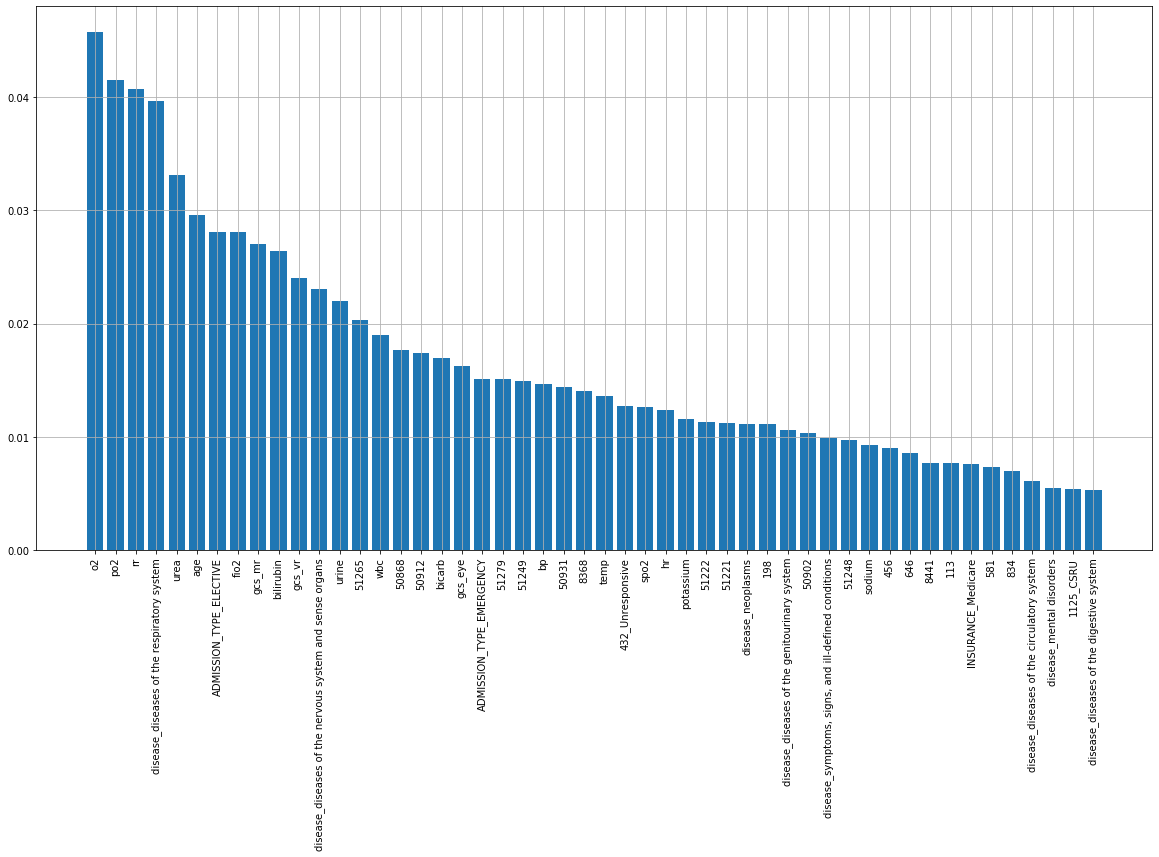

In [64]:
rfc = RandomForestClassifier(max_depth=10, random_state=0)
rfc.fit(X, y)
importance = rfc.feature_importances_
fig, ax = plt.subplots(figsize=(20, 10))
a, b = zip(*sorted(zip(importance,feature_names), reverse=True))

ax.bar(b[:50], a[:50])

ax.set_xticklabels(labels = b[:50], rotation=90)
ax.grid()
plt.show();

In [65]:
labitems[(labitems['ITEMID']==50912)|(labitems['ITEMID']==50868)]

,ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
195,69,50868,Anion Gap,Blood,Chemistry,1863-0
239,113,50912,Creatinine,Blood,Chemistry,2160-0


In [66]:
selected_features = ['50912', '50868']
selected = other[selected_features+['HADM_ID']]
selected = selected.rename(columns={'50912':'aniongap', '50868':'creatinine'})
m_features = selected.merge(admission, on='HADM_ID').merge(table, on='HADM_ID').drop(['HADM_ID', 'LOS'], axis=1)
m_features

,aniongap,creatinine,ADMISSION_TYPE,GENDER,age,INSURANCE,disease_certain conditions originating in the perinatal period,"disease_complications of pregnancy, childbirth, and the puerperium",disease_congenital anomalies,disease_diseases of the blood and blood-forming organs,...,wbc,potassium,bilirubin,po2,o2,urea,bicarb,sodium,rr,spo2
0,0.6,13.000000,EMERGENCY,0,65,Private,0,0,0,0,...,5.1,4.4,0.400000,287.0,68.12902,17.0,28.00000,140.000000,18.000000,99.0
1,0.7,12.000000,ELECTIVE,1,71,Medicare,0,0,0,0,...,7.6,3.9,1.274861,370.0,68.12902,15.0,22.00000,143.000000,12.000000,93.0
2,0.7,13.000000,EMERGENCY,1,75,Medicare,0,0,0,0,...,10.9,4.2,0.800000,286.0,68.12902,16.0,27.00000,140.000000,19.165328,100.0
3,0.9,14.000000,EMERGENCY,1,39,Private,0,0,0,0,...,9.8,4.1,0.500000,72.0,68.12902,13.0,24.00000,139.000000,18.000000,97.0
4,1.6,19.000000,EMERGENCY,1,59,Private,0,0,0,0,...,12.2,3.3,0.400000,102.0,68.12902,50.0,23.00000,134.000000,21.000000,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50772,1.1,9.000000,ELECTIVE,1,78,Medicare,0,0,0,0,...,13.0,4.2,1.274861,428.0,68.12902,27.0,21.00000,141.000000,14.000000,100.0
50773,0.7,16.000000,EMERGENCY,1,88,Medicare,0,0,0,0,...,6.2,4.6,1.274861,193.0,68.12902,15.0,29.00000,149.000000,24.000000,100.0
50774,0.6,6.000000,EMERGENCY,0,20,Private,0,0,0,1,...,8.9,3.3,1.274861,433.0,100.00000,9.0,15.00000,142.000000,28.000000,100.0
50775,1.3,15.424776,EMERGENCY,0,84,Medicare,0,0,0,0,...,30.3,4.2,1.274861,227.0,100.00000,20.0,24.34611,138.198731,29.000000,100.0


In [68]:
m_features.to_csv('m_features.csv')